# Aprendizaje Supervisado en la Academia de la Flota Estelar. 💫

#### **¡Bienvenido a la Academia de la Flota Estelar, cadete!** Prepárate para un viaje de desafío y aprendizaje constante, donde tus aptitudes y tu esfuerzo serán puestos a prueba en cada misión.
## Algoritmos clásicos.

## Capítulo 1. La Regresión Lineal pilota el valor de tu nave espacial.

#### Predicción del valor de una nave espacial 🚀
### *"El destino favorece a los niños, a los locos y a las naves llamadas Enterprise."* (Comandante William T. Riker)

En este primer ejercicio debes desarrollar un modelo de aprendizaje automático capaz de predecir el valor de una nave espacial en función de sus características, utilizando un algoritmo de regresión lineal. La regresión lineal es una técnica supervisada que busca modelar la relación entre una variable dependiente (en este caso, el precio de la nave) y una o más variables independientes (las características de la nave).

Usarás un conjunto de datos ficticio que consta de 100 naves de la Flota Estelar de la Federación de Planetas. Cada nave cuenta con dos características principales:


*   **Precio**: Medido en miles de Créditos Federales, es el valor objetivo que el modelo intentará predecir.
*   **Velocidad máxima de Warp**: Medida en una escala de 1 a 10. Naves con mayor velocidad Warp son generalmente más caras debido a su avanzada tecnología.

Una vez entrenado, evalúa la precisión del modelo y cómo de bien se ajusta a los datos proporcionados.

Coeficientes del modelo:
Pendiente (β1): 494.01
Variable independiente (β0): 987.97

Métricas de rendimiento en entrenamiento:
Error cuadrático medio: 57.76
Error absoluto medio: 43.59
R-cuadrado: 0.9909

Métricas de rendimiento en prueba:
Error cuadrático medio: 37.97
Error absoluto medio: 29.64
R-cuadrado: 0.9968


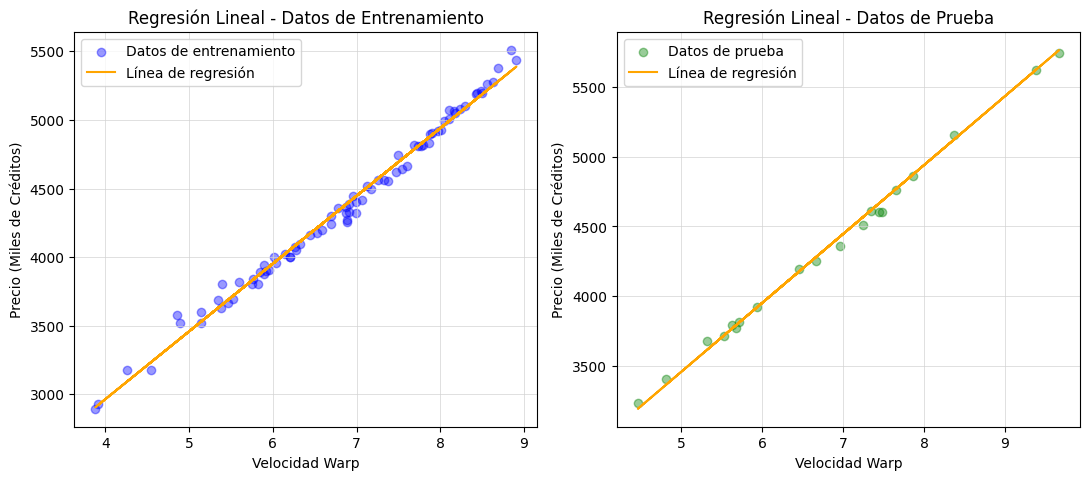


Ejemplo de predicción:
Para una nave con velocidad Warp 7.5, el precio predicho es: 4693.00 miles de créditos


/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


data = pd.read_csv('starships_dataset.csv')
X = data[['Velocidad_Warp']]
y = data['Precio_Miles_Creditos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea y entrena el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Calcula métricas
mse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train) # indica qué proporción de la varianza en el precio es explicada por la velocidad Warp
mae_train = mean_absolute_error(y_train, y_pred_train)
# error cuadrático medio (mse) y error absoluto medio (mae) indican la precisión de las predicciones

mse_test = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Coeficientes del modelo:")
print(f"Pendiente (β1): {modelo.coef_[0]:.2f}")
# representa cuánto aumenta el precio por cada unidad de velocidad Warp
print(f"Variable independiente (β0): {modelo.intercept_:.2f}")
# representa el precio base cuando la velocidad Warp es 0

print("\nMétricas de rendimiento en entrenamiento:")
print(f"Error cuadrático medio: {mse_train:.2f}")
print(f"Error absoluto medio: {mae_train:.2f}")
print(f"R-cuadrado: {r2_train:.4f}")

print("\nMétricas de rendimiento en prueba:")
print(f"Error cuadrático medio: {mse_test:.2f}")
print(f"Error absoluto medio: {mae_test:.2f}")
print(f"R-cuadrado: {r2_test:.4f}")

# Visualizaciones
plt.figure(figsize=(11, 9))

# Gráfico 1: Datos de entrenamiento y línea de regresión
plt.subplot(221)
plt.scatter(X_train, y_train, color='blue', alpha=0.4, label='Datos de entrenamiento')
plt.plot(X_train, y_pred_train, color='orange', label='Línea de regresión')
plt.xlabel('Velocidad Warp')
plt.ylabel('Precio (Miles de Créditos)')
plt.title('Regresión Lineal - Datos de Entrenamiento')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.legend()

# Gráfico 2: Datos de prueba y línea de regresión
plt.subplot(222)
plt.scatter(X_test, y_test, color='green', alpha=0.4, label='Datos de prueba')
plt.plot(X_test, y_pred_test, color='orange', label='Línea de regresión')
plt.xlabel('Velocidad Warp')
plt.ylabel('Precio (Miles de Créditos)')
plt.title('Regresión Lineal - Datos de Prueba')
plt.grid(True, which='both', color='lightgray', linestyle='-', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

# Ejemplo de predicción
velocidad_ejemplo = np.array([[7.5]])
precio_predicho = modelo.predict(velocidad_ejemplo)[0]
print(f"\nEjemplo de predicción:")
print(f"Para una nave con velocidad Warp 7.5, el precio predicho es: {precio_predicho:.2f} miles de créditos")

## Capítulo 2. Tu supervivencia en manos de la Regresión logística.
#### Clasificación de naves espaciales (Amistosas y Hostiles ☠️).
### *"He sido, y siempre seré, su amigo."* (Comandante Spock 🖖🏻)

En el siguiente ejercicio debes desarrollar un modelo de aprendizaje automático capaz de clasificar naves espaciales como amistosas u hostiles, en función de sus características, utilizando un algoritmo de regresión logística. La regresión logística es una técnica supervisada que busca modelar la probabilidad de que una observación pertenezca a una de dos clases posibles (en este caso, 'Amistosa' u 'Hostil').

El conjunto de datos que utilizas es ficticio y consta de 200 naves espaciales de diferentes civilizaciones y con las siguientes características:

* **Velocidad Warp**: velocidad máxima que puede alcanzar la nave, en una escala de 1 a 10.
* **Potencia Phaser**: medida en gigajulios.
* **Tripulantes**: número de tripulantes a bordo de la nave.
* **Capacidad de Carga**: medida en miles de t.
* **Escudos**: deflectores de energía que posee la nave: 0, 1 (navegación), 2 (combate).
* **Camuflaje**: la nave tiene tecnología de camuflaje (1), o carece de ella (0).
* **Origen**: especie a la que pertenece la nave {Federación: 0, Klingon: 1, Romulano: 2, Borg: 3, Vulcano: 4,
    Andoriano: 5, Llyriano: 6, Ba`ul: 7, Ferengi: 8, Gorn: 9, Xindi: 10}
* **Amistosa**: la variable objetivo: amistosa (1) u hostil (0).

El objetivo del modelo es predecir el valor de la variable 'Amistosa' en función de las variables mencionadas anteriormente.

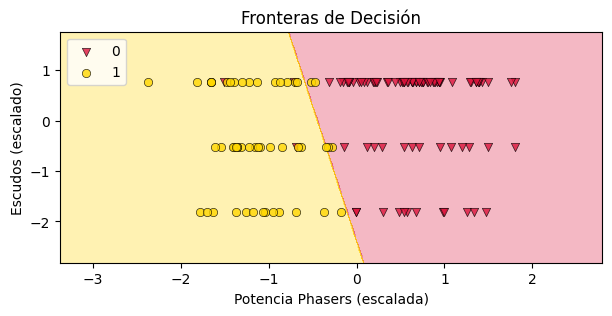

La nave no identificada se considera: 0
Precisión en entrenamiento: 0.95
Precisión en prueba: 0.90


/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Carga el dataset
df = pd.read_csv('complex_starship_dataset.csv')

# Selecciona solo las características 'Escudos' y 'Camuflaje' y la variable objetivo 'Amistosa'
X = df[['Potencia_Phaser','Escudos']]
y = df['Amistosa']

# Divide el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escala las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrena el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Función para graficar las regiones de decisión
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # Configuro el generador de marcadores y el mapa de colores
    markers = ('v', 'o')
    colors = ('crimson', 'gold')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Dibuja la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Dibuja los ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], linewidth=0.5,
                    marker=markers[idx], label=cl, edgecolor='black')

# Dibuja las regiones de decisión para el conjunto de entrenamiento
plt.figure(figsize=(7, 3))
plot_decision_regions(X_train_scaled, y_train, classifier=model)
plt.xlabel('Potencia Phasers (escalada)')
plt.ylabel('Escudos (escalado)')
plt.legend(loc='upper left')
plt.title('Fronteras de Decisión')
plt.show()

# Ejemplo de predicción
example = np.array([[650, 2]])
example_scaled = scaler.transform(example)
prediction = model.predict(example_scaled)
print(f'La nave no identificada se considera: {prediction[0]}')

# Evalúa el rendimiento del modelo
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)
print(f'Precisión en entrenamiento: {train_score:.2f}')
print(f'Precisión en prueba: {test_score:.2f}')

## Capítulo 3. Algoritmo *Softmax Regression* o Regresión Logística Multinomial.
#### Clasificación de especies de plantas alienígenas 🪷
### *"Inspeccione cada pieza de flora que encuentre, Capitán. La vida en todas sus formas debe ser respetada."* (Comandante Spock 🖖🏻)

En una misión reciente, un equipo de científicos de la Federación de Planetas Unidos descubrió un planeta inexplorado repleto de flora alienígena. La tripulación de la USS Enterprise recopiló una serie de datos sobre las características físicas y químicas de estas plantas, y tu objetivo es clasificarlas en diferentes categorías.

El conjunto de datos es ficticio y consta de 200 entradas, cada una con las siguientes características:

* **Altura**: en centímetros.
* **Macronutrientes**: en gramos.
* **Concentración de toxinas**: en microgramos por gramo.
* **Cantidad de humedad**: expreseada como % de la masa.
* **Presencia de hojas**: (sí/no)
* **Presencia de flores**: (sí/no)
* **Hábitat**: (desierto, bosque, pantano o montaña)
* **Clase**: Categoría a la que pertenece la planta.

Utilizando el algoritmo Softmax Regression, intentarás predecir la clase de cada planta alienígena basándote en sus características.

Las posibles categorías de clasificación son:
* **Comestible segura**: Planta completamente apta para el consumo.
* **Comestible parcialmente venenosa**: Planta que puede ser consumida con precaución o después de un tratamiento.
* **No comestible venenosa**: Planta completamente tóxica.
* **Comestible con propiedades medicinales**: Planta con usos terapéuticos o curativos.

Al final del ejercicio, habrás creado un modelo capaz de predecir a qué categoría pertenece una nueva planta descubierta, ayudando a los exploradores de la Federación a tomar decisiones informadas sobre el uso de estas especies.

Varianza explicada por los componentes: [0.32133182 0.18533592]


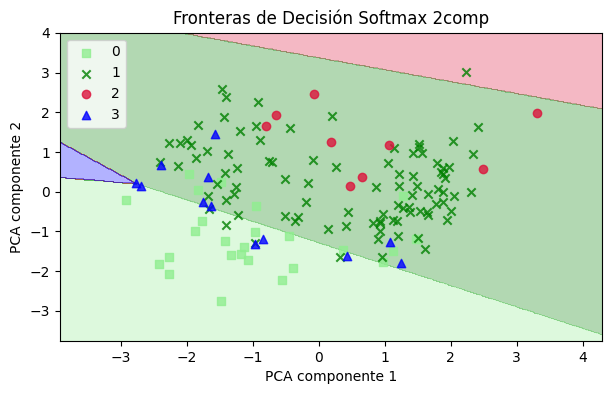

La clase predicha para la planta es: 0
Accuracy: 0.72
Precision: 0.57
Recall: 0.72
F1-Score: 0.63

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.78      0.98      0.87        41
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         8

    accuracy                           0.72        60
   macro avg       0.28      0.37      0.32        60
weighted avg       0.57      0.72      0.63        60



/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contro

In [3]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

df = pd.read_csv('alien_plants_dataset.csv')

X = df.drop('Clase', axis=1)
y = df['Clase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reduce la dimensionalidad a 2 componentes usando PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Varianza explicada por los componentes: {pca.explained_variance_ratio_}")

softmax_reg1 = LogisticRegression(solver='lbfgs', random_state=42)
softmax_reg1.fit(X_train_pca, y_train)

# Función para graficar las regiones de decisión
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configura el generador de marcadores y el mapa de colores
    markers = ('s', 'x', 'o', '^')
    colors = ('lightgreen', 'green', 'crimson', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Dibuja la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Dibuja los ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

    plt.xlabel('PCA componente 1')
    plt.ylabel('PCA componente 2')
    plt.legend(loc='upper left')
    plt.title('Fronteras de Decisión Softmax 2comp')
    plt.show()

# Dibuja las regiones de decisión
plt.figure(figsize=(7, 4))
plot_decision_regions(X_train_pca, y_train, classifier=softmax_reg1)

# Ejemplo de predicción
example = np.array([[50, 80, 10, 70, 1, 1, 1]]) # planta comestible segura (Clase 0)
example_scaled = scaler.transform(example)
example_pca = pca.transform(example_scaled)
prediction = softmax_reg1.predict(example_pca)
print(f'La clase predicha para la planta es: {prediction[0]}')

# Evalúa el rendimiento del modelo
y_pred = softmax_reg1.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

#### *“Maldita sea, Jim, algunos errores no se pueden solucionar con una segunda oportunidad. A veces, el daño es irreversible.”* (Dr. Leonard "Bones" McCoy ⛑️)

Las métricas del modelo clasificador son muy pobres. El modelo no está funcionando bien para clasificar las especies de plantas. Puede deberse a la reducción en las dimensiones que has practicado para dibujar las fronteras de decisión; solo dos componentes pueden hacer perder información necesaria para una buena clasificación.

Además es posible que las clases estén desbalanceadas en el dataset (es decir, que estén desigualmente representadas), lo que provocará que el modelo tenga dificultades para aprender patrones.

Igualmente, prueba de nuevo tu algoritmo Softmax Regression, **en esta ocasión con la totalidad de las variables del conjunto** de datos, y observa si mejora su rendimiento.

In [4]:
df = pd.read_csv('alien_plants_dataset.csv')

X = df.drop('Clase', axis=1)
y = df['Clase']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

softmax_reg2 = LogisticRegression(solver='lbfgs', random_state=42)
softmax_reg2.fit(X_train2_scaled, y_train2)

example2 = np.array([[70, 60, 30, 50, 1, 1, 3]]) # planta con propiedades medicinales (Clase 3)
example2_scaled = scaler2.transform(example2)
prediction = softmax_reg2.predict(example2_scaled)
print(f'La clase predicha para la planta es: {prediction[0]}')

# Evalúa el rendimiento del modelo
y_pred2 = softmax_reg2.predict(X_test2_scaled)

accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test2, y_pred2, average='weighted')
recall = recall_score(y_test2, y_pred2, average='weighted')
f1 = f1_score(y_test2, y_pred2, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print('\nClassification Report:')
print(classification_report(y_test2, y_pred2))

La clase predicha para la planta es: 0
Accuracy: 0.83
Precision: 0.86
Recall: 0.83
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.85      1.00      0.92        41
           2       1.00      0.60      0.75         5
           3       1.00      0.25      0.40         8

    accuracy                           0.83        60
   macro avg       0.86      0.63      0.67        60
weighted avg       0.86      0.83      0.81        60



/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### *“La confianza es un lujo que no siempre podemos darnos el gusto de otorgar.”* (Comandante Benjamin Sisko en *Star Trek: Deep Space Nine*)
Como puedes apreciar, cadete, aunque el rendimiento del modelo ha mejorado notablemente, ha fallado clasificando a nuestra planta alienígena de ejemplo como planta Comestible Segura, cuando de hecho es una planta con propiedadaes medicinales que podrías haber usado para revertir las lesiones que la **neuroparasitosis bendii** 👾🤕 está provocando en el sistema nervioso de la oficial científica T'Pol.

Por ello debes seguir explorando nuevos algoritmos de clasificación; puedes usar el algoritmo de Análisis Discriminante Lineal (LDA), que no solo reduce la dimensionalidad de los datos, sino que también maximiza la separación entre las clases, lo que puede mejorar significativamente la precisión del modelo de clasificación.

## Capítulo 4. Algoritmo *Linear Discriminant Analysis* (LDA).

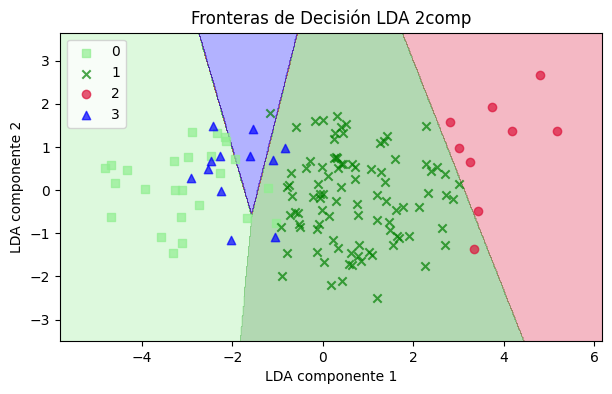

La clase predicha para la prueba 1 es: 0
La clase predicha para la prueba 2 es: 1
La clase predicha para la prueba 3 es: 2
La clase predicha para la prueba 4 es: 0
Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.89      1.00      0.94        41
           2       1.00      0.80      0.89         5
           3       0.67      0.25      0.36         8

    accuracy                           0.83        60
   macro avg       0.75      0.64      0.66        60
weighted avg       0.82      0.83      0.81        60



/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

df = pd.read_csv('alien_plants_dataset.csv')

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

scaler3 = StandardScaler()
X_train3_scaled = scaler3.fit_transform(X_train3)
X_test3_scaled = scaler3.transform(X_test3)

# Reduce la dimensionalidad a 2 componentes usando LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train3_scaled, y_train3)
X_test_lda = lda.transform(X_test3_scaled)

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_lda, y_train3)

# Función para dibujar las regiones de decisión
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^')
    colors = ('lightgreen', 'green', 'crimson', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Dibuja la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Dibuja los ejemplos de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.7, c=colors[idx],
                    marker=markers[idx], label=cl)

    plt.xlabel('LDA componente 1')
    plt.ylabel('LDA componente 2')
    plt.legend(loc='upper left')
    plt.title('Fronteras de Decisión LDA 2comp')
    plt.show()

plt.figure(figsize=(7, 4))
plot_decision_regions(X_train_lda, y_train3, classifier=model_lda)

# Ejemplos de plantas para cada clase
planta_comestible_segura = np.array([[50, 80, 10, 70, 1, 1, 1]])
planta_parcialmente_venenosa = np.array([[100, 50, 60, 40, 1, 0, 2]])
planta_no_comestible_venenosa = np.array([[30, 20, 90, 20, 0, 0, 0]])
planta_propiedades_medicinales = np.array([[70, 60, 30, 50, 1, 1, 3]])

ejemplos_plantas = np.vstack([
    planta_comestible_segura,
    planta_parcialmente_venenosa,
    planta_no_comestible_venenosa,
    planta_propiedades_medicinales
])

ejemplos_plantas_scaled = scaler.transform(ejemplos_plantas)

ejemplos_plantas_lda = lda.transform(ejemplos_plantas_scaled)

predicciones = model_lda.predict(ejemplos_plantas_lda)

for i, pred in enumerate(predicciones):
    print(f'La clase predicha para la prueba {i+1} es: {pred}')
y_pred = model_lda.predict(X_test_lda)

accuracy = accuracy_score(y_test3, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test3, y_pred, average='weighted')
recall = recall_score(y_test3, y_pred, average='weighted')
f1 = f1_score(y_test3, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print('\nClassification Report:')
print(classification_report(y_test3, y_pred))

El algoritmo LDA es más efectivo reduciendo la dimensionalidad a 2 componentes en comparación con el algoritmo Softmax Regression.
### *"La lógica es el comienzo de la sabiduría, no el final."* (Comandante Spock 🖖🏻)

...pero no olvides la importancia de evaluar el rendimiento del modelo utilizando todas las variables del dataset.
Es necesario hacer pruebas adicionales con todas las características para asegurarte de que el modelo esté aprovechando al máximo toda la información disponible.


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

df = pd.read_csv('alien_plants_dataset.csv')

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=42)

scaler4 = StandardScaler()
X_train4_scaled = scaler4.fit_transform(X_train4)
X_test4_scaled = scaler4.transform(X_test4)

model_lda2 = LinearDiscriminantAnalysis()
model_lda2.fit(X_train4_scaled, y_train4)

planta_comestible_medicinal = np.array([[70, 60, 30, 50, 1, 1, 3]])
planta_comestible_medicinal_scaled = scaler.transform(planta_comestible_medicinal)

prediccion = model_lda2.predict(planta_comestible_medicinal_scaled)
print(f'La clase predicha para la planta de prueba es: {prediccion[0]}')

# Evalúa el rendimiento del modelo LDA
y_pred = model_lda2.predict(X_test4_scaled)

accuracy = accuracy_score(y_test4, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test4, y_pred, average='weighted')
recall = recall_score(y_test4, y_pred, average='weighted')
f1 = f1_score(y_test4, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

La clase predicha para la planta de prueba es: 0
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1-Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.91      1.00      0.95        41
           2       1.00      0.80      0.89         5
           3       0.67      0.25      0.36         8

    accuracy                           0.85        60
   macro avg       0.77      0.68      0.69        60
weighted avg       0.84      0.85      0.83        60



/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Aunque puedes ver una mejora apreciable en el rendimiento del modelo tras no reducir las dimensiones del dataset, aún es un reto clasificar aquellas clases de plantas que están menos representadas. Esto es algo común en el mundo del aprendizaje automático, es como si intentaras aprender a identificar una especie rara de planta que solo has visto una o dos veces en tu vida. Es mucho más difícil que reconocer una planta común que ves todos los días.

Te faltarían ejemplos para aprender patrones claros.
### *"La perfección es un camino, no un destino."* (Capitán Jean-Luc Picard)

¡Tu instrucción continúa, cadete! 🌱🪐

---

## Capítulo 5. Modelo *Decision Tree*.
#### Prediciendo tus probabilidades de sobrevivir a un ataque Romulano 👹⚡️

### *"En la batalla, la supervivencia no es cuestión de suerte, sino de decisiones estratégicas."* (Capitán Jean-Luc Picard)

En este ejercicio vas a utilizar el algoritmo Decision Tree para predecir la probabilidad de supervivencia de la tripulación de una nave de la Flota Estelar en una batalla contra naves enemigas. Decision Tree es una técnica supervisada que se utiliza tanto para problemas de clasificación como de regresión. Su estructura en forma de árbol permite descomponer decisiones complejas en una serie de decisiones más simples, facilitando la interpretación y visualización del modelo.

Usarás un conjunto de datos ficticio que contiene el histórico de 250 batallas espaciales y las características de las naves involucradas. Las características incluyen:

* **Daño sufrido por la nave**: medido en una escala de 0 a 9.
* **Tamaño de la nave**: pequeña = 0, mediana = 1, grande = 2.
* **Escudos**: deflectores de energía que posee la nave: 0, 1 (navegación), 2 (combate).
* **Tripulación**: número de tripulantes a bordo de la nave.
* **Experiencia del Capitán**: medida en años de servicio.
* **Número de Enemigos**: cantidad de naves enemigas en la batalla.
* **Tipo de nave enemiga**: caza = 0, acorazado = 1, corbeta = 2, destructor = 3, nave insignia = 4.
* **Duración de la batalla**: medida en microciclos (análogos a décimas de segundo).
* **Sistema estelar donde ocurre la batalla**: apoyo aliado remoto = 0, apoyo aliado próximo = 1.
* **Supervivencia**: variable objetivo que indica si la tripulación sobrevivió (1) o no (0).

Tu objetivo es predecir la probabilidad de supervivencia de la tripulación en función de las variables. Al final del ejercicio, habrás creado un modelo capaz de ayudar a los comandantes de la Flota Estelar a tomar decisiones informadas durante las batallas espaciales, aumentando así las probabilidades de supervivencia de su tripulación.

##### Ajusta tu estrategia para sobrevivir:

Para mejorar el rendimiento del árbol de decisión, puedes ajustar los hiperparámetros del modelo, como la profundidad máxima del árbol (max_depth), el número mínimo de muestras por hoja (min_samples_leaf), etc.

Accuracy: 0.55
Precision: 0.55
Recall: 0.55
F1-Score: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.59        40
           1       0.52      0.49      0.50        35

    accuracy                           0.55        75
   macro avg       0.54      0.54      0.54        75
weighted avg       0.55      0.55      0.55        75


Confusion Matrix:
[[24 16]
 [18 17]]
Probabilidad de supervivencia de la tripulación: 0.94


/Users/aitor/Desktop/bootcamp IA Factoria F5/proyectos/Pildora_ML_supervisado_Algoritmos_clasicos/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


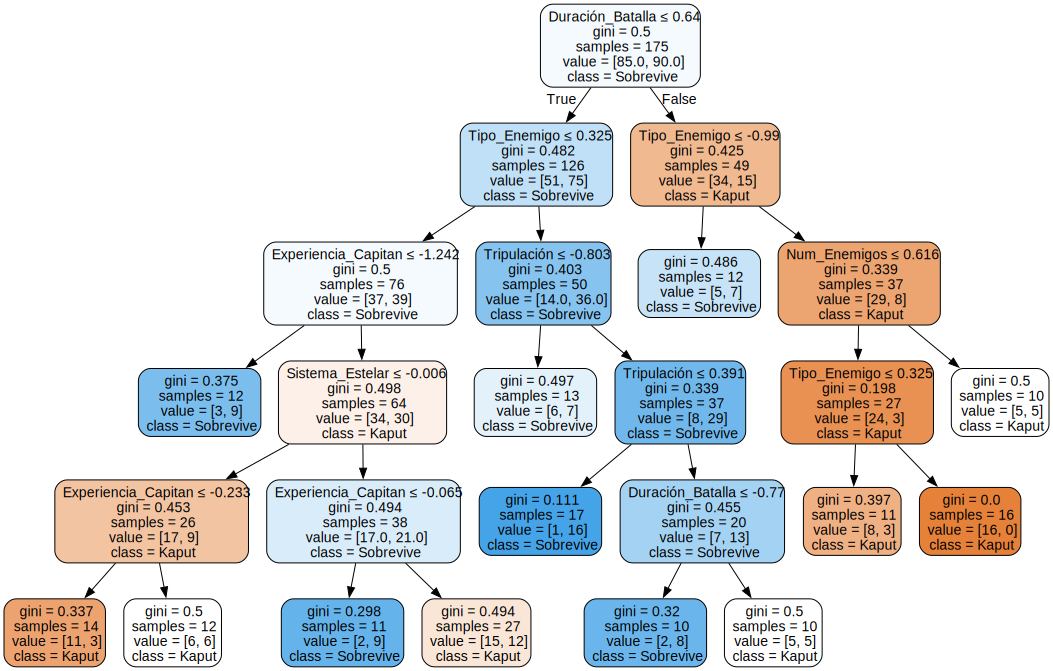

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import graphviz
from IPython.display import display

# Cargo el dataset
battlesdf = pd.read_csv('galactic_battles_dataset.csv')

X = battlesdf.drop('Supervivencia', axis=1)
y = battlesdf['Supervivencia']

X_train_battles, X_test_battles, y_train_battles, y_test_battles = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled_battles = scaler.fit_transform(X_train_battles)
X_test_scaled_battles = scaler.transform(X_test_battles)

# Entreno el modelo de Decision Tree
model_dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
model_dt.fit(X_train_scaled_battles, y_train_battles)

# Evalúo el rendimiento del modelo
y_pred = model_dt.predict(X_test_scaled_battles)

accuracy = accuracy_score(y_test_battles, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test_battles, y_pred, average='weighted')
recall = recall_score(y_test_battles, y_pred, average='weighted')
f1 = f1_score(y_test_battles, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

print('\nClassification Report:')
print(classification_report(y_test_battles, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test_battles, y_pred))

# Creo un ejemplo con datos no vistos por el modelo
example_battle = np.array([[5, 1, 2, 500, 20, 10, 3, 50, 1]])
example_scaled_battle = scaler.transform(example_battle)

probabilidad_supervivencia = model_dt.predict_proba(example_scaled_battle)
print(f'Probabilidad de supervivencia de la tripulación: {probabilidad_supervivencia[0][1]:.2f}')

# Dibujo el árbol de decisiones
feature_names = X.columns
class_names = ['Kaput', 'Sobrevive']

dot_data = export_graphviz(
    model_dt, 
    out_file=None, 
    feature_names=feature_names, 
    class_names=class_names, 
    filled=True, 
    rounded=True, 
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)

#### Interpretación del Árbol de Decisión:
* Nodos de Decisión: Cada nodo de decisión representa una característica del dataset y un umbral de decisión. Por ejemplo, un nodo podría representar la característica "Daño" con un umbral de 5. Si el valor de "Daño" es menor o igual a 5, el árbol sigue el camino de la izquierda; de lo contrario, sigue el camino de la derecha.

* Hojas: Las hojas del árbol representan las predicciones finales. Cada hoja muestra la clase predicha (0 para "No Sobrevive" y 1 para "Sobrevive") y el número de muestras que llegan a esa hoja.

* Gini Impurity: Cada nodo muestra el valor de la impureza de Gini, que mide la pureza de las muestras en ese nodo. Un valor de 0 indica que todas las muestras en ese nodo pertenecen a una sola clase.

* Samples: Cada nodo muestra el número de muestras que llegan a ese nodo.

* Value: Cada nodo muestra la distribución de las clases en ese nodo. Por ejemplo, [50, 30] indica que hay 50 muestras de la clase 0 y 30 muestras de la clase 1 en ese nodo.